<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Learning-Recommender_Systems/blob/main/HW05_EM_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import norm

In [ ]:
# Expectation Step
def e_step(data, pi, mu, sigma):
    K = len(pi)  # Number of components
    N = len(data)

    # Compute responsibilities (posterior probabilities)
    resp = np.zeros((N, K))
    for k in range(K):
        resp[:, k] = pi[k] * norm.pdf(data, loc=mu[k], scale=sigma[k])

    resp /= resp.sum(axis=1, keepdims=True)  # Normalize responsibilities
    return resp

In [ ]:
# Maximization Step
def m_step(data, resp):
    K = resp.shape[1]

    Nk = resp.sum(axis=0)  # Sum of responsibilities for each component
    pi_new = Nk / len(data)  # Update mixing coefficients

    mu_new = np.array([np.sum(resp[:, k] * data) / Nk[k] for k in range(K)])  # Update means
    sigma_new = np.array([
        np.sqrt(np.sum(resp[:, k] * (data - mu_new[k])**2) / Nk[k])
        for k in range(K)
    ])  # Update standard deviations

    return pi_new, mu_new, sigma_new

In [ ]:
# EM Algorithm
def EM_algorithm(data, K, iterations, pi, mu, sigma):
    for _ in range(iterations):
        resp = e_step(data, pi, mu, sigma)
        pi, mu, sigma = m_step(data, resp)
    return pi, mu, sigma, resp

In [ ]:
pi_final, mu_final, sigma_final, resp_final = EM_algorithm(data, 2, 100, pi, mu, sigma)
cluster_assignments = np.argmax(resp_final, axis=1)

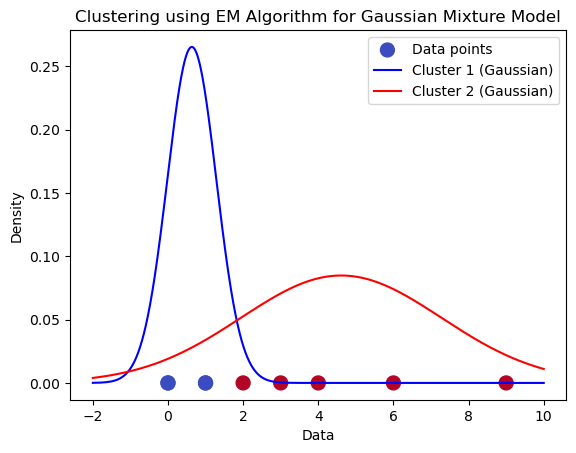

In [ ]:
plt.scatter(data, np.zeros_like(data), c=cluster_assignments, cmap='coolwarm', s=100, label="Data points")
x_vals = np.linspace(-2, 10, 1000)
y1 = pi_final[0] * norm.pdf(x_vals, mu_final[0], sigma_final[0])
y2 = pi_final[1] * norm.pdf(x_vals, mu_final[1], sigma_final[1])

plt.plot(x_vals, y1, label="Cluster 1 (Gaussian)", color='blue')
plt.plot(x_vals, y2, label="Cluster 2 (Gaussian)", color='red')

plt.legend()
plt.xlabel("Data")
plt.ylabel("Density")
plt.title("Clustering using EM Algorithm for Gaussian Mixture Model")
plt.show()